<a href="https://colab.research.google.com/github/juanganb1/IA/blob/main/IA_02_04_S9_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd

data, target = datasets.load_iris(return_X_y = True)

iris_vis = np.concatenate((data, target.reshape(150,1)), axis = 1)
#print(iris_vis)

iris_df = pd.DataFrame(iris_vis, columns = ('C de sepalo' , 'L de sepalo', 'C de petalo', 'L de petalo', 'Especie'))
iris_df.head(n=150)

,C de sepalo,L de sepalo,C de petalo,L de petalo,Especie
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
def normaliza_dataset(x):
  min = np.min(x, axis = 0)
  max = np.max(x, axis = 0)
  # print(min)
  # print(max)
  new_min = 0
  new_max = 1.0

  for i in range(0, x.shape[1]):
    x[i:, i] = ((x[i:, i] - min[i]) / (max[i] - min[i])) * (new_max - new_min)
    # print(x[i:, i])
  return x

def one_hot_encoder(y):
  encoded = np.zeros((y.shape[0], 3))

  for i, n in enumerate(y):
    encoded[i, n] = 1
#  print(encoded)
  return encoded


x = normaliza_dataset(data)
y = one_hot_encoder(target)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
#print(x_train.shape[0])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

def FeedForward():
  model = Sequential()

  model.add(Dense(10, input_shape = (4,)))
  model.add(Activation('relu'))
  model.add(Dense (10, activation = 'relu'))
  model.add(Dense(3))
  model.add(Activation('softmax'))

  model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['acc'])

  return model

model = FeedForward()

history = model.fit(x_train, y_train, batch_size = 150, epochs = 2500, validation_data = (x_test, y_test), verbose=2)
#1/1 - 0s - loss: 0.4340 - acc: 0.9000 - val_loss: 0.5506 - val_acc: 0.8000 - 40ms/epoch - 40ms/step
#1/1 - 0s - loss: 0.2284 - acc: 0.9750 - val_loss: 0.3993 - val_acc: 0.8667 - 60ms/epoch - 60ms/step

Epoch 1/2500
1/1 - 1s - loss: 1.0150 - acc: 0.5750 - val_loss: 1.0411 - val_acc: 0.6333 - 656ms/epoch - 656ms/step
Epoch 2/2500
1/1 - 0s - loss: 1.0140 - acc: 0.5917 - val_loss: 1.0401 - val_acc: 0.6333 - 33ms/epoch - 33ms/step
Epoch 3/2500
1/1 - 0s - loss: 1.0130 - acc: 0.6000 - val_loss: 1.0392 - val_acc: 0.6333 - 34ms/epoch - 34ms/step
Epoch 4/2500
1/1 - 0s - loss: 1.0119 - acc: 0.6000 - val_loss: 1.0383 - val_acc: 0.6333 - 49ms/epoch - 49ms/step
Epoch 5/2500
1/1 - 0s - loss: 1.0109 - acc: 0.6000 - val_loss: 1.0374 - val_acc: 0.6333 - 31ms/epoch - 31ms/step
Epoch 6/2500
1/1 - 0s - loss: 1.0098 - acc: 0.6167 - val_loss: 1.0365 - val_acc: 0.6333 - 36ms/epoch - 36ms/step
Epoch 7/2500
1/1 - 0s - loss: 1.0088 - acc: 0.6167 - val_loss: 1.0356 - val_acc: 0.6333 - 51ms/epoch - 51ms/step
Epoch 8/2500
1/1 - 0s - loss: 1.0078 - acc: 0.6333 - val_loss: 1.0347 - val_acc: 0.6333 - 33ms/epoch - 33ms/step
Epoch 9/2500
1/1 - 0s - loss: 1.0067 - acc: 0.6333 - val_loss: 1.0338 - val_acc: 0.6333 - 30ms

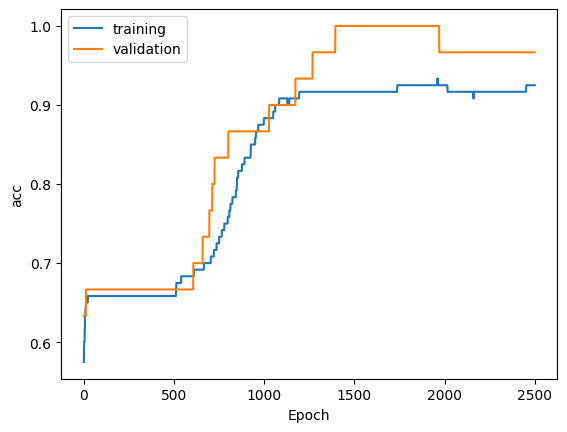

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.legend(['training','validation'], loc='upper left')
plt.show()

In [ ]:
sample_x, sample_y = x_test[0], y_test[0]

pred = model.predict(sample_x.reshape(1,4))

pred = np.argmax(pred)
print(sample_x, sample_y, pred)


1/1 [==============================] - 0s 51ms/step
[0.25       0.625      0.08474576 0.04166667] [1. 0. 0.] 0
